# Homework 6
## Shannon Dow
### Question 3: 

For this question, we are considering the differential equation: 
$$ \frac{d}{dx}(\kappa(x)u'(x)) = 0$$
With dirichlet boundary data on [0,1] and where $\kappa(x)$ is the defined as the discontinuous function: 
$$\kappa(x) = \begin{cases}
\epsilon & x < 0.5 \\
1 & x > 0.5
\end{cases}$$

In [1]:
%matplotlib inline

In [2]:
from pylab import *

In [3]:
import logging
logging.captureWarnings(True)
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.sparse import diags
import scipy.sparse.linalg as sp_linalg

In [4]:
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display

def animate_figs(figs):
    show_frame = lambda frameno: display(figs[frameno])
    interact(show_frame, frameno=widgets.IntSlider(min=0,max=len(figs)-1, value=0))

In [5]:
def kap(x,eps):
    k = []
    l = len(x)
    k = ones(l)
    for i in range(0,l):
        if x[i] < 0.5:
            k[i] = eps*k[i]
    return k

In [6]:
def utrue_fcn(x,eps): 
    u = []
    l = len(x)
    for i in range(0,l):
        if x[i] < 0.5:
            newu = ((2/(1+eps))*x[i])
            u.append(newu)
        elif x[i] >= 0.5:
            newu = ((2*eps/(1+eps))*x[i]+((1-eps)/(1+eps)))
            u.append(newu)
    return u
        

In [7]:
f_fcn = lambda x: 0*x

In [8]:
def matvec(v):
    m = len(v)
    h = 1./(m+1)
    v_full = zeros(m+2)
    k = zeros(m+2)
    v_full[1:-1] = v
    b = (kappa_imh_j*v_full[:-2]- (kappa_imh_j+kappa_iph_j)*v_full[1:-1]+ kappa_iph_j*v_full[2:]) / h**2
    return b

In [9]:
def solve_bvp_CG(f_fcn, utrue_fcn, m, maxiter, kplot, verbose=False):
    
    h = 1./(m+1)
    x_full = linspace(0,1,m+2)
    x = x_full[1:m+1] # interior points

    utrue_full = utrue_fcn(x_full,eps)
    utrue = utrue_full[1:m+1]  # at interior points
    
    # Dirichlet boundary values from true solution:
    alpha = 0
    beta = 1

    f_full = f_fcn(x_full)

    # right-hand side:
    f = f_full[1:m+1]  # at interior points

    # adjust for Dirichlet BCs:
    f[0] = f[0] - alpha / h**2
    f[m-1] = f[m-1] - beta / h**2

    # initial guess:
    U0_full = linspace(alpha, beta, m+2)  # linear
    U0 = U0_full[1:m+1]  # interior points

    U = U0.copy() # current iterate
    r = f - matvec(U)  # initial residual
    p = r.copy()  # initial direction

    tol = 10**-14  # stop if the residual 

    enorm = abs(U-utrue).max()
    errors = [enorm]
    errors2 = []
    figs = []  # for the list of figures we generate

    rTr_km = dot(r,r)  # r^T * r at iteration k-1

    for k in range(1,maxiter+1):
        w = matvec(p)   # the only matrix-vector multiply
        a = rTr_km / dot(p,w) # alpha_{k-1} in CG algorithm
        U = U + a*p
        r = r - a*w

        enorm = abs(U-utrue).max()
        errors.append(enorm)

        if mod(k,kplot)==0 or k==maxiter:
            # every kplot iterations create a plot:
            fig = figure(figsize=(12,5))
            plot(x_full,U0_full,'r-o', label='initial guess')
            plot(x_full,utrue_full,'k-o', label='true solution')
            U_full = hstack([alpha,U,beta])
            plot(x_full,U_full,'bo-', label= 'iteration k = %i' % k)
            legend()
            grid(True)
            xlim(0,1)
            ylim(0,3)
            title('After %i iterations, norm(error) = %.2e' \
                  % (k, enorm))
            figs.append(fig)
            close(fig)

        rTr_k = dot(r,r)
        rnorm = sqrt(rTr_k)
        errors2.append(rnorm)
        
        if verbose:
            print('iteration %3i:   2-norm(r) = %.2e,   max-norm(E) = %.2e' \
                  % (k,rnorm,enorm))
        
        if rnorm < tol:
            print('Stopping after %i iterations' % k)
            break

        # determine next search direction:
        b = rTr_k / rTr_km   # beta_{k-1} in CG algorithm
        rTr_km = rTr_k       # for next iteration
        p = r + b*p           # next search direction
    return errors,errors2, figs

### Part (c) Implementing Conjugate Gradient

In [10]:
m = 19;
eps = 0.1;
ax = 0;
bx = 1;
dx = (bx-ax)/(m+1.);

X_full = linspace(0,1,m+2)
X = X_full[1:-1]

X_imh_j = X - dx/2.
kappa_imh_j = kap(X_imh_j,eps)

X_iph_j = X + dx/2.
kappa_iph_j = kap(X_iph_j,eps)

errors,errors2,figs = solve_bvp_CG(f_fcn, utrue_fcn, m=m, maxiter=100, kplot=1, verbose=False)

m = 19;
eps = 10**(-3);
ax = 0;
bx = 1;
dx = (bx-ax)/(m+1.);

X_full = linspace(0,1,m+2)
X = X_full[1:-1]

X_imh_j = X - dx/2.
kappa_imh_j = kap(X_imh_j,eps)

X_iph_j = X + dx/2.
kappa_iph_j = kap(X_iph_j,eps)

errorsn,errors2n,figs = solve_bvp_CG(f_fcn, utrue_fcn, m=m, maxiter=100, kplot=1, verbose=False)

Stopping after 27 iterations
Stopping after 39 iterations


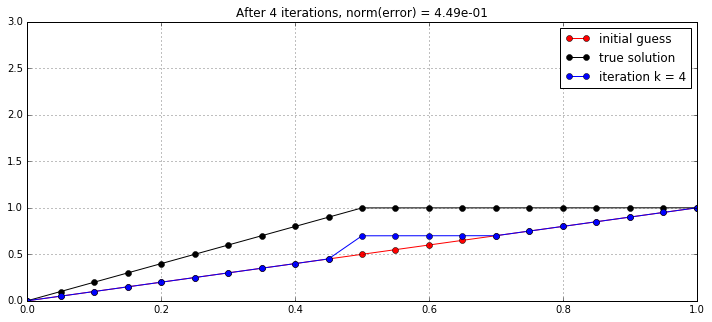

<function __main__.<lambda>>

In [11]:
show_frame = lambda frameno: display(figs[3])
interact(show_frame, frameno=widgets.IntSlider(min=0,max=len(figs)-1, value=0))

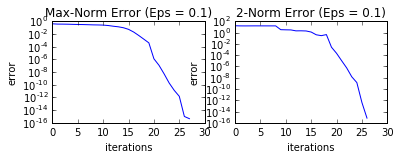

In [12]:
subplot(2,2,1)
semilogy(errors)
title('Max-Norm Error (Eps = 0.1)')
xlabel('iterations')
ylabel('error')
subplot(2,2,2)
semilogy(errors2)
title('2-Norm Error (Eps = 0.1)')
xlabel('iterations')
ylabel('error')

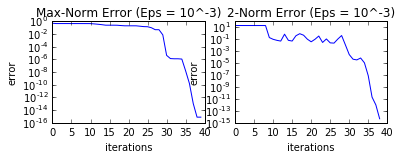

In [13]:
subplot(2,2,3)
semilogy(errorsn)
title('Max-Norm Error (Eps = 10^-3)')
xlabel('iterations')
ylabel('error')
subplot(2,2,4)
semilogy(errors2n)
title('2-Norm Error (Eps = 10^-3)')
xlabel('iterations')
ylabel('error')

#### Thoughts for (c)
Despite m = 19, it takes 27 iterations ($\epsilon$ = 0.1) and 39 iterations ($\epsilon = 10^{-3}$). It only converges in m iterations for exact arithmetic. When $\epsilon$ is decreased, it requires more iterations to converge. 

Additionally, it can be observed that iterations do small piecewise jumps up to the true solution. 

### Part (d) Implementing Diagonal Pre-Conditioned Conjugate Gradient

In [14]:
def make_plot(U,k,rnorm):
    
    # colormap for kappa:
    kappa_min = kappa_full.min()
    kappa_max = 2*kappa_full.max()
    levels = linspace(kappa_min,kappa_max,21)
    cmap = get_cmap('Purples')  # white to purple
    vmin = kappa_min; vmax = kappa_max
    
    fig = figure(figsize=(10,6))
    U_full = Ubc_full.copy()  # for boundary values
    U_full[1:-1, 1:-1] = U
    
    contourf(X_full,Y_full,kappa_full,levels,
             cmap=cmap,vmin=vmin,vmax=vmax)
    
    axis('scaled')
    colorbar(shrink=0.8, label='kappa')
    
    # plot u, which corresponds to the stream function psi for this problem!
    # so contours of u are approximate streamlines of the flow
    
    Ulevels = linspace(0,1,21)
    contour(X_full,Y_full,U_full,Ulevels,
             colors='k')
    
    title('iteration %3i:   2-norm(r) = %.2e\n' % (k,rnorm) \
          + 'Streamlines of approximate solution')
    
    close(fig)
    return fig

In [15]:
def inner_product(V,W):
    """
    Given two grid functions V and W on an mx by my grid. 
    Return their inner product when viewed as vectors of unknowns
    """
    return sum(V*W)

In [16]:
m = 19;
eps = 0.1;
alpha = 0;
beta = 1;
dx = (beta-alpha)/(m+1.);
h = 1/(m+1)
X_full = linspace(0,1,m+2);
X = X_full[1:-1];

X_imh_j = X - dx/2.;
kappa_imh_j = kap(X_imh_j,eps);

X_iph_j = X + dx/2.;
kappa_iph_j = kap(X_iph_j,eps);


Mdiag = (kappa_imh_j + kappa_iph_j) / dx**2;


In [17]:
maxiter = 1000
kplot = 100
verbose = True
tol = 10**-14  # stop if the residual falls below tol


# right-hand side:
F_full = f_fcn(X_full)
f = F_full[1:-1]  # at interior points

# adjust for Dirichlet BCs:
f[0] = f[0] - alpha / h**2
f[m-1] = f[m-1] - beta / h**2


# initial guess:
U0_full = X_full
U0 = U0_full[1:-1]  # interior points

U = U0.copy() # current iterate
r = f - matvec(U)  # initial residual

z = r / Mdiag  # apply preconditioner

k = 0
zTr_k = inner_product(z,r)  # modified for PCG
p = z.copy()

rTr_k = inner_product(r,r)  # for checking convergence
rnorm = sqrt(rTr_k)
rnorms = [rnorm]  # build up list of residuals

if verbose:
    print('iteration %3i:   2-norm(r) = %.2e' \
          % (k,rnorm))
    
figs = []  # for the list of figures we generate

#fig = make_plot(U,k,rnorm) # plot initial guess
#figs.append(fig)

zTr_km = zTr_k  # in general will hold z^T * r at iteration k-1

for k in range(1,maxiter+1):
    w = matvec(p)   # the only matrix-vector multiply
    a = zTr_km / inner_product(p,w)  # alpha_{k-1} in PCG algorithm
    U = U + a*p
    r = r - a*w
    z = r / Mdiag  # apply preconditioner

    zTr_k = inner_product(z,r)  # modified for PCG
    
    rTr_k = inner_product(r,r)  # for checking convergence
    rnorm = sqrt(rTr_k)
    rnorms.append(rnorm)

    if verbose:
        print('iteration %3i:   2-norm(r) = %.2e'% (k,rnorm))
    
    # check for convergence:
    if rnorm < tol:
        print('Satisfied rnorm < tol after %i iterations' % k)
        break
        
    # determine next search direction:
    b = zTr_k / zTr_km   # beta_{k-1} in PCG algorithm
    zTr_km = zTr_k       # for next iteration
    p = z + b*p           # next search direction

print('Stopped after %i iterations with 2-norm(r) = %.2e' \
   % (k,rnorm))

iteration   0:   2-norm(r) = 1.80e+01
iteration   1:   2-norm(r) = 1.64e+01
iteration   2:   2-norm(r) = 1.64e+01
iteration   3:   2-norm(r) = 1.64e+01
iteration   4:   2-norm(r) = 1.64e+01
iteration   5:   2-norm(r) = 1.64e+01
iteration   6:   2-norm(r) = 1.64e+01
iteration   7:   2-norm(r) = 1.64e+01
iteration   8:   2-norm(r) = 1.64e+01
iteration   9:   2-norm(r) = 1.64e+01
iteration  10:   2-norm(r) = 2.16e-14
iteration  11:   2-norm(r) = 1.04e-14
iteration  12:   2-norm(r) = 1.05e-14
iteration  13:   2-norm(r) = 1.19e-14
iteration  14:   2-norm(r) = 1.02e-14
iteration  15:   2-norm(r) = 9.71e-15
Satisfied rnorm < tol after 15 iterations
Stopped after 15 iterations with 2-norm(r) = 9.71e-15


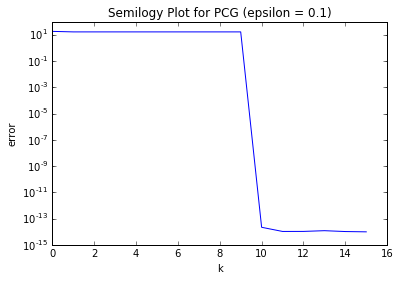

In [18]:
semilogy(rnorms)
title('Semilogy Plot for PCG (epsilon = 0.1)')
xlabel('k')
ylabel('error')

In [19]:
m = 19;
eps = 10**(-3);
alpha = 0;
beta = 1;
dx = (beta-alpha)/(m+1.);
h = 1/(m+1)
X_full = linspace(0,1,m+2);
X = X_full[1:-1];

X_imh_j = X - dx/2.;
kappa_imh_j = kap(X_imh_j,eps);

X_iph_j = X + dx/2.;
kappa_iph_j = kap(X_iph_j,eps);


Mdiag = (kappa_imh_j + kappa_iph_j) / dx**2;



In [20]:
maxiter = 1000
kplot = 100
verbose = True
tol = 10**-14  # stop if the residual falls below tol


# right-hand side:
F_full = f_fcn(X_full)
f = F_full[1:-1]  # at interior points

# adjust for Dirichlet BCs:
f[0] = f[0] - alpha / h**2
f[m-1] = f[m-1] - beta / h**2


# initial guess:
U0_full = X_full
U0 = U0_full[1:-1]  # interior points

U = U0.copy() # current iterate
r = f - matvec(U)  # initial residual

z = r / Mdiag  # apply preconditioner

k = 0
zTr_k = inner_product(z,r)  # modified for PCG
p = z.copy()

rTr_k = inner_product(r,r)  # for checking convergence
rnorm = sqrt(rTr_k)
rnorms = [rnorm]  # build up list of residuals

if verbose:
    print('iteration %3i:   2-norm(r) = %.2e' \
          % (k,rnorm))
    
figs = []  # for the list of figures we generate

#fig = make_plot(U,k,rnorm) # plot initial guess
#figs.append(fig)

zTr_km = zTr_k  # in general will hold z^T * r at iteration k-1

for k in range(1,maxiter+1):
    w = matvec(p)   # the only matrix-vector multiply
    a = zTr_km / inner_product(p,w)  # alpha_{k-1} in PCG algorithm
    U = U + a*p
    r = r - a*w
    z = r / Mdiag  # apply preconditioner

    zTr_k = inner_product(z,r)  # modified for PCG
    
    rTr_k = inner_product(r,r)  # for checking convergence
    rnorm = sqrt(rTr_k)
    rnorms.append(rnorm)

    if verbose:
        print('iteration %3i:   2-norm(r) = %.2e'% (k,rnorm))
    
    # check for convergence:
    if rnorm < tol:
        print('Satisfied rnorm < tol after %i iterations' % k)
        break
        
    # determine next search direction:
    b = zTr_k / zTr_km   # beta_{k-1} in PCG algorithm
    zTr_km = zTr_k       # for next iteration
    p = z + b*p           # next search direction

print('Stopped after %i iterations with 2-norm(r) = %.2e' \
   % (k,rnorm))

iteration   0:   2-norm(r) = 2.00e+01
iteration   1:   2-norm(r) = 2.00e+01
iteration   2:   2-norm(r) = 2.00e+01
iteration   3:   2-norm(r) = 2.00e+01
iteration   4:   2-norm(r) = 2.00e+01
iteration   5:   2-norm(r) = 2.00e+01
iteration   6:   2-norm(r) = 2.00e+01
iteration   7:   2-norm(r) = 2.00e+01
iteration   8:   2-norm(r) = 2.00e+01
iteration   9:   2-norm(r) = 2.00e+01
iteration  10:   2-norm(r) = 2.51e-14
iteration  11:   2-norm(r) = 4.61e-15
Satisfied rnorm < tol after 11 iterations
Stopped after 11 iterations with 2-norm(r) = 4.61e-15


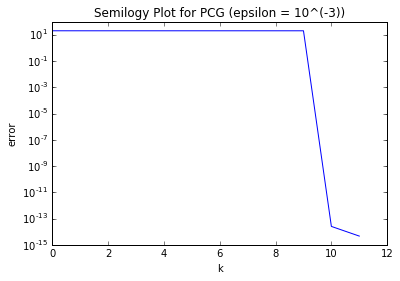

In [21]:
semilogy(rnorms)
title('Semilogy Plot for PCG (epsilon = 10^(-3))')
xlabel('k')
ylabel('error')

#### Thoughts on (d)
Here, you can see that when we use a pre-conditioned matrix M = diag(A) the PCG converges in less than m = 19 iterations. In the PCG, the algorithm converges faster when $\epsilon$ is smaller. 

In [23]:
Mdiag

array([  8.00000000e-01,   8.00000000e-01,   8.00000000e-01,
         8.00000000e-01,   8.00000000e-01,   8.00000000e-01,
         8.00000000e-01,   8.00000000e-01,   8.00000000e-01,
         4.00400000e+02,   8.00000000e+02,   8.00000000e+02,
         8.00000000e+02,   8.00000000e+02,   8.00000000e+02,
         8.00000000e+02,   8.00000000e+02,   8.00000000e+02,
         8.00000000e+02])